# CNN on MNIST Assignment

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.initializers import RandomNormal
from keras.initializers import he_normal


Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, fig):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

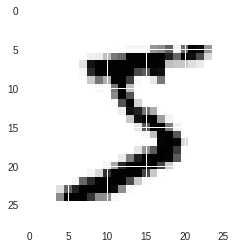

In [5]:
#plot the first image in the dataset
plt.imshow(x_train[0])

In [0]:

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the data
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


**3 Convolutional Layers**

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape,kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(56, (2, 2), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
          
model.add(Conv2D(64, (7, 7), activation='relu',padding='same',kernel_initializer='he_normal'))            
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
                 
model.add(Flatten())
                 
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
                 
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 155s 3ms/step - loss: 0.3946 - acc: 0.8746 - val_loss: 0.0578 - val_acc: 0.9827
Epoch 2/12
60000/60000 [==============================] - 154s 3ms/step - loss: 0.1072 - acc: 0.9672 - val_loss: 0.0410 - val_acc: 0.9854
Epoch 3/12
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0820 - acc: 0.9746 - val_loss: 0.0324 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0674 - acc: 0.9790 - val_loss: 0.0252 - val_acc: 0.9913
Epoch 5/12
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0607 - acc: 0.9810 - val_loss: 0.0250 - val_acc: 0.9916
Epoch 6/12
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0539 - acc: 0.9832 - val_loss: 0.0237 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0484 - acc: 0.9851 - val_loss: 0.0241 - 

Test loss: 0.019146056534175296
Test accuracy: 0.9935


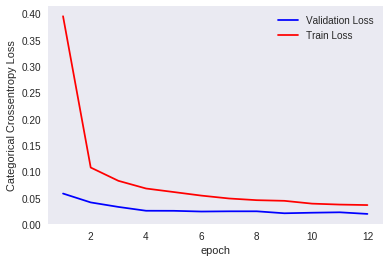

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

**5 Convolutional Layers**

In [17]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape,kernel_initializer='he_normal'))


model.add(Conv2D(64, (4, 4), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(Dropout(0.2))

model.add(Conv2D(32, (2, 2), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(48, (6, 6), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(75, (7, 7), activation='relu',padding='same',kernel_initializer='he_normal'))            
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
                 
model.add(Flatten())
                 
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
                 
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 483s 8ms/step - loss: 0.9169 - acc: 0.7087 - val_loss: 0.1797 - val_acc: 0.9453
Epoch 2/12
60000/60000 [==============================] - 474s 8ms/step - loss: 0.1709 - acc: 0.9534 - val_loss: 0.0493 - val_acc: 0.9854
Epoch 3/12
60000/60000 [==============================] - 479s 8ms/step - loss: 0.1148 - acc: 0.9684 - val_loss: 0.0327 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 475s 8ms/step - loss: 0.0901 - acc: 0.9760 - val_loss: 0.0378 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 477s 8ms/step - loss: 0.0805 - acc: 0.9784 - val_loss: 0.0255 - val_acc: 0.9927
Epoch 6/12
60000/60000 [==============================] - 484s 8ms/step - loss: 0.0719 - acc: 0.9802 - val_loss: 0.0257 - val_acc: 0.9929
Epoch 7/12
60000/60000 [==============================] - 479s 8ms/step - loss: 0.0651 - acc: 0.9826 - val_loss: 0.0221 - 

Test loss: 0.019213508488982917
Test accuracy: 0.9945


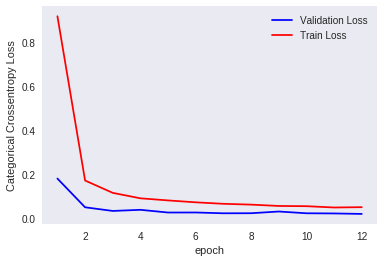

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

**7 Convolutinal Layers**

In [22]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape,kernel_initializer='he_normal'))


model.add(Conv2D(64, (4, 4), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(Dropout(0.5))

model.add(Conv2D(56, (2, 2), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(Dropout(0.3))

model.add(Conv2D(52, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(Dropout(0.5))

model.add(Conv2D(38, (2, 2), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Conv2D(46, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))          
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(75, (7, 7), activation='relu',padding='same',kernel_initializer='he_normal'))            
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
                 
model.add(Flatten())
                 
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(132, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
                 
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 949s 16ms/step - loss: 1.7727 - acc: 0.3808 - val_loss: 1.1725 - val_acc: 0.5277
Epoch 2/12
60000/60000 [==============================] - 945s 16ms/step - loss: 0.7809 - acc: 0.7491 - val_loss: 1.4365 - val_acc: 0.4784
Epoch 3/12
60000/60000 [==============================] - 944s 16ms/step - loss: 0.5319 - acc: 0.8458 - val_loss: 0.8908 - val_acc: 0.6959
Epoch 4/12
60000/60000 [==============================] - 955s 16ms/step - loss: 0.4274 - acc: 0.8816 - val_loss: 0.5441 - val_acc: 0.8189
Epoch 5/12
60000/60000 [==============================] - 963s 16ms/step - loss: 0.3558 - acc: 0.9024 - val_loss: 0.4254 - val_acc: 0.8661
Epoch 6/12
60000/60000 [==============================] - 965s 16ms/step - loss: 0.3082 - acc: 0.9166 - val_loss: 0.3840 - val_acc: 0.8808
Epoch 7/12
60000/60000 [==============================] - 972s 16ms/step - loss: 0.2742 - acc: 0.9278 - val_loss: 0.

Test loss: 0.17265315302610398
Test accuracy: 0.9509


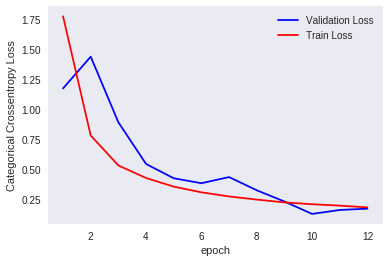

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, fig)

### Conclusion:

In [2]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Architecture","Test score","Test accuracy"]

x.add_row(["3 Layer",0.019,0.9935])
x.add_row(["5 Layer",0.019,0.9945])
x.add_row(["7 Layer",0.172,0.9509])

print(x)

+--------------+------------+---------------+
| Architecture | Test score | Test accuracy |
+--------------+------------+---------------+
|   3 Layer    |   0.019    |     0.9935    |
|   5 Layer    |   0.019    |     0.9945    |
|   7 Layer    |   0.172    |     0.9509    |
+--------------+------------+---------------+
